# Multiple Regression

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [19]:
# Multiple regression is like linear regression, but with more than one independent value,
# meaning that we try to predict a value based on two or more variables

# We can predict the CO2 emission of a car based on the size of the engine,
# but with multiple regression we can throw in more variables,
# like the weight of the car, to make the prediction more accurate

data = [["Toyota", "Aygo", 1000, 790, 99],
        ["Mitsubish", "Space Star", 1200, 1160, 95],
        ["Skoda", "Citigo", 1000, 921, 95],
        ["Fiat", "500", 900, 865, 90],
        ["Mini", "Cooper", 1500, 1140, 105],
        ["VW", "Up!", 1000, 921, 105],
        ["Skoda", "Fabia", 1400, 1109, 90],
        ["Mercedes", "A-Class", 1500, 1365, 92],
        ["Ford", "Fiesta", 1500, 1112, 98],
        ["Audi", "A1", 1600, 1150, 99],
        ["Hyundai", "I20", 1100, 980, 99],
        ["Suzuki", "Swift", 1300, 990, 101],
        ["Ford", "Fiesta", 1000, 1112, 99],
        ["Honda", "Civic", 1600, 1252, 94],
        ["Hyundai", "I30", 1600, 1326, 97],
        ["Opel", "Astra", 1600, 1330, 97],
        ["BMW", "1", 1600, 1365, 99],
        ["Mazda", "3", 2200, 1280, 104],
        ["Skoda", "Rapid", 1600, 1119, 104],
        ["Ford", "Focus", 2000, 1328, 105],
        ["Ford", "Mondeo", 1600, 1584, 94],
        ["Opel", "Insignia", 2000, 1428, 99],
        ["Mercedes", "C-Class", 2100, 1365, 99],
        ["Skoda", "Octavia", 1600, 1415, 99],
        ["Volvo", "S60", 2000, 1415, 99],
        ["Mercedes", "CLA", 1500, 1465, 102],
        ["Audi", "A4", 2000, 1490, 104],
        ["Audi", "A6", 2000, 1725, 114],
        ["Volvo", "V70", 1600, 1523, 109],
        ["BMW", "5", 2000, 1705, 114],
        ["Mercedes", "E-Class", 2100, 1605, 115],
        ["Volvo", "XC70", 2000, 1746, 117],
        ["Ford", "B-Max", 1600, 1235, 104],
        ["BMW", "2", 1600, 1390, 108],
        ["Opel", "Zafira", 1600, 1405, 109],
        ["Mercedes", "SLK", 2500, 1395, 120]]

# Create a data frame
df = pd.DataFrame(data, columns = ["Car", "Model", "Volume", "Weight", "CO2"])

# Make a list of the independent values
X = df[["Weight", "Volume"]]
# Put the dependent values in a variable
y = df["CO2"]

# Create a linear regression object
regr = linear_model.LinearRegression()
# Fill the regression object with the values
regr.fit(X, y)

# Predict the CO2 emission of a car
predictedCO2 = regr.predict([[2300, 1300]]) # Weight is 2300 kg and volume is 1300 cm3
predictedCO2

/Users/fosse/Desktop/python/regressions/linear-regression-venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.08944811])

In [20]:

# Coefficient (suom. kerroin) is a factor that describes the relationship with an unknown variable
# If x is a variable, then 2x is x two times; x is the unknown variable, and the number 2 is the coefficient

# In this case, we can ask for the coefficient value of weight against CO2,
# and for volume against CO2
# The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values
regr.coef_

array([0.00744098, 0.0078431 ])

In [21]:
# The coefficient values we got tell us that if the weight increases by 1 kg, the CO2 emission increases by 0.00744098 g,
# and if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.0078431 g

### Scale

In [22]:
# It can be difficult to compare a volume of 1.0 l with a weight of 790 kg,
# but if we scale them both into comparable values, we can easily see how much one value is compared to the other

# There are different methods for scaling data, this time we'll use a method called standardization

# The standardization method uses formula
# z = (x - u) / s
# where z is the new value, x is the original value, u is the mean and s is the standard deviation

# If you take the weight column from the car dataset used earlier, the first value is 790, and the scaled value will be
# (790 - 1292.23) / 238.74 = -2.1
# If you take the volume column from the same dataset, the first value is 1.0, and the scaled value will be
# (1.0 - 1.61) / 0.38 = -1.59
# Now you can compare -2.1 with -1.59 instead of comparing 790 with 1.0

# Create a Scaler object with methods for transforming data sets
scale = StandardScaler()

# Make a list of the independent values
X = df[["Weight", "Volume"]]

# Fit the list to the data, then transform it
scaledX = scale.fit_transform(X) # Fits transformer to X and returns a transformed version of X
scaledX

array([[-2.09604004, -1.59336644],
       [-0.55063689, -1.07190106],
       [-1.54888379, -1.59336644],
       [-1.78278264, -1.85409913],
       [-0.63417219, -0.28970299],
       [-1.54888379, -1.59336644],
       [-0.76365192, -0.55043568],
       [ 0.30559999, -0.28970299],
       [-0.75112162, -0.28970299],
       [-0.59240454, -0.0289703 ],
       [-1.30245464, -1.33263375],
       [-1.26068698, -0.81116837],
       [-0.75112162, -1.59336644],
       [-0.16637448, -0.0289703 ],
       [ 0.14270615, -0.0289703 ],
       [ 0.15941321, -0.0289703 ],
       [ 0.30559999, -0.0289703 ],
       [-0.04942506,  1.53542584],
       [-0.72188426, -0.0289703 ],
       [ 0.15105968,  1.01396046],
       [ 1.22031159, -0.0289703 ],
       [ 0.5687362 ,  1.01396046],
       [ 0.30559999,  1.27469315],
       [ 0.51443826, -0.0289703 ],
       [ 0.51443826,  1.01396046],
       [ 0.72327652, -0.28970299],
       [ 0.82769565,  1.01396046],
       [ 1.80923549,  1.01396046],
       [ 0.96552891,

In [23]:
# Predict CO2 values

# Create a Scaler object with methods for transforming data sets
scale = StandardScaler()

# Make a list of the independent values
X = df[["Weight", "Volume"]]
# Put the dependent values in a variable
y = df["CO2"]

# Fit the list to the data, then transform it
scaledX = scale.fit_transform(X) # Fits transformer to X and returns a transformed version of X

# Create a linear regression object
regr = linear_model.LinearRegression()
# Fill the regression object with the values
regr.fit(scaledX, y)

# Perform standardization
scaled = scale.transform([[2300, 1.3]])

# Predict the CO2 emission of a car
predictedCO2 = regr.predict([scaled[0]])
predictedCO2

/Users/fosse/Desktop/python/regressions/linear-regression-venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.90361445])

### Train/Test

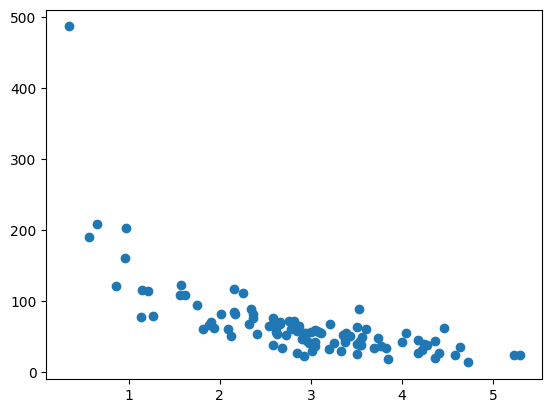

In [24]:
# Train/Test is a method to measure the accuracy of your model
# It's called Train/Test because you split the dataset into two sets: a training set and testing set
# Usually 80/20

# You train the model using the training set; train the model means create the model
# You test the model using the testing set; test the model means test the accuracy of the model

np.random.seed(2)

X = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / X

plt.scatter(X, y)
plt.show()

In [25]:
# Split the data into train and test
train_X = X[:80]
train_y = y[:80]

test_X = X[80:]
test_y = y[80:]

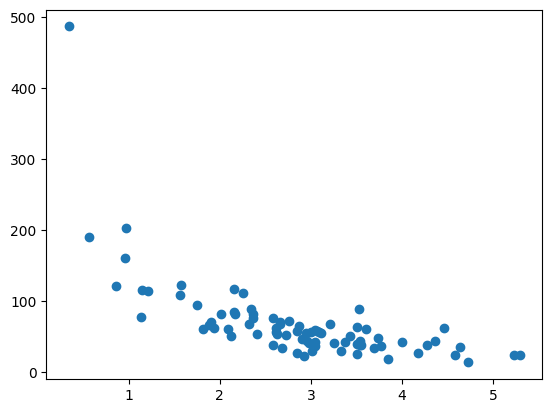

In [26]:
# Display the training set
plt.scatter(train_X, train_y)
plt.show()

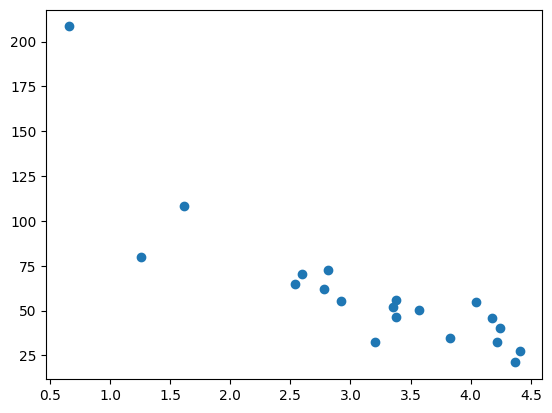

In [27]:
# Display the testing set
plt.scatter(test_X, test_y)
plt.show()

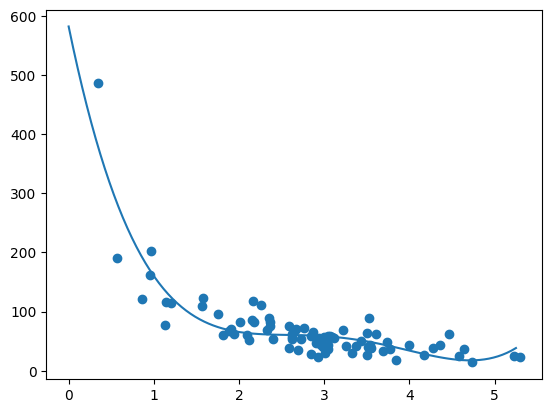

In [28]:
# What does the dataset look like?
# The best fit would be a polynomial regression
# Draw a polynomial regression line through the data points

# Make a polynomial model
myModel = np.poly1d(np.polyfit(train_X, train_y, 4)) # x values, y values, deg (degree of the fitting polynomial)

# Specify how the line will display
myLine = np.linspace(0, 5.25, 100) # Start from position 0, end at position 6, 100 positions along the way

plt.scatter(train_X, train_y)
plt.plot(myLine, myModel(myLine))
plt.show()